# Homework 3
## Exercise 1 - Preliminaty Parts
Pierluigi Compagnone 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
from utility import * 

## 1.1 Epidemic on a known graph

You should simulate an epidemic on a symmetric $k-$regular graph $G = (V, E)$ with $|V|=500$ nodes and $k=4$.

In [2]:
k = 4
n_nodes = 500 

G = nx.Graph()
sources = np.arange(n_nodes)

for i in range(1, int(k/2) + 1):
    targets = np.roll(sources, i)
    G.add_edges_from(zip(sources, targets))

#nx.draw(G)
#plt.show()

With one week being one unit of time, simulate the epidemic for 15 weeks. You can choose an initial configuration with 10 infected nodes selected at random from the node set $V$, or make a different choice of initial configuration (in the latter case, please briefly discuss your motivation).
Do this $N = 100$ times and plot the following:

In [3]:
# Initialization
beta = 0.3
ro = 0.7
n_steps = 100
n_weeks = 15
initial_infected = 10
n_stati = 3
policy = "random"

simu= np.zeros([n_steps,n_weeks, n_nodes])

# Simulations loop
for _ in range(0,n_steps):
    print("# Simulation ",_)
    
    states = np.zeros([n_weeks, n_nodes])
    
    # Initial condition 
    x0 = set_init_config(G, initial_infected, policy)
    states[0] = x0
    
    # Single simulation loop
    for i in range(1,n_weeks):
        # Take last configuration
        x = np.copy( states[i-1] )        
        rates = new_conf_rates(G, x, beta, ro, n_stati)
        
        # Chose the next configuration 
        next_pos = np.argmax(np.cumsum(rates,axis=1) > np.random.rand(n_nodes,1), axis=1)
        states[i] = next_pos
        
    simu[_] = states

# Simulation  0
# Simulation  1
# Simulation  2
# Simulation  3
# Simulation  4
# Simulation  5
# Simulation  6
# Simulation  7
# Simulation  8
# Simulation  9
# Simulation  10
# Simulation  11
# Simulation  12
# Simulation  13
# Simulation  14
# Simulation  15
# Simulation  16
# Simulation  17
# Simulation  18
# Simulation  19
# Simulation  20
# Simulation  21
# Simulation  22
# Simulation  23
# Simulation  24
# Simulation  25
# Simulation  26
# Simulation  27
# Simulation  28
# Simulation  29
# Simulation  30
# Simulation  31
# Simulation  32
# Simulation  33
# Simulation  34
# Simulation  35
# Simulation  36
# Simulation  37
# Simulation  38
# Simulation  39
# Simulation  40
# Simulation  41
# Simulation  42
# Simulation  43
# Simulation  44
# Simulation  45
# Simulation  46
# Simulation  47
# Simulation  48
# Simulation  49
# Simulation  50
# Simulation  51
# Simulation  52
# Simulation  53
# Simulation  54
# Simulation  55
# Simulation  56
# Simulation  57
# Simulation  58
# Simul

In [4]:
# To visulize the pandemic evolution over the weeks 
# (Just for small graphs)
#graph_evolution(G, states, n_stati)

- The average number of newly infected individuals each week. In other words, you should plot how many people become infected each week (on the average).


Average new infected per week:
 [ 9.92 11.76 10.91  8.43  5.91  4.18  3.01  2.2   1.56  1.14  0.94  0.66
  0.5   0.32  0.19]


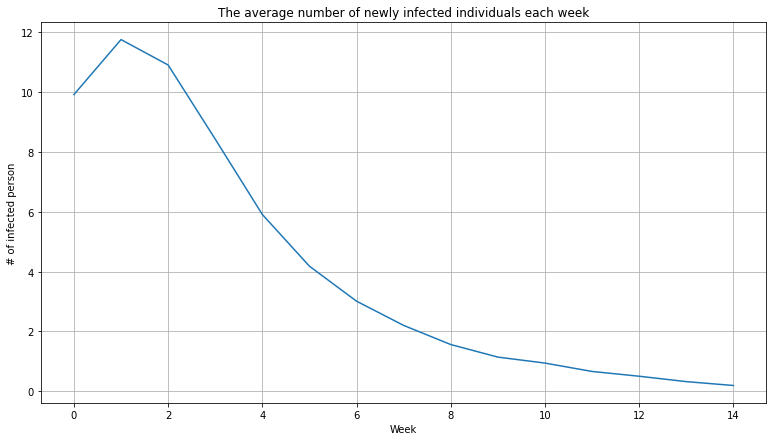

In [5]:
# Compute the average new infected
simu_week_i = np.zeros([n_steps, n_weeks])

for i in range( simu.shape[0] ):     
    simu_week_i[i] =  new_weekly( simu[i], 1 ) 
    
avg_week_i = np.mean(simu_week_i ,axis=0)

print("Average new infected per week:\n {}".format(avg_week_i))

# Plot the average new infected per week
plt.figure(figsize = (13 ,7))
plt.plot(range(n_weeks), avg_week_i) 
plt.xlabel("Week")
plt.ylabel("# of infected person")
plt.title("The average number of newly infected individuals each week")
plt.grid()
#plt.savefig("./images/Ex1_1_{}.png".format(policy) )
plt.show()

- The average total number of susceptible, infected, and recovered individuals at each week. In other words, you should plot how many individuals in total that are susceptible/infected/recovered at each week (on the average).

Average susceptible per week:
 [490.08 478.32 467.41 458.98 453.07 448.89 445.88 443.68 442.12 440.98
 440.04 439.38 438.88 438.56 438.37]
Average infected per week:
 [ 9.92 14.9  15.51 13.12  9.64  6.75  5.02  3.85  2.86  2.22  1.62  1.15
  0.9   0.56  0.29]
Average recovered per week:
 [ 0.    6.78 17.08 27.9  37.29 44.36 49.1  52.47 55.02 56.8  58.34 59.47
 60.22 60.88 61.34]


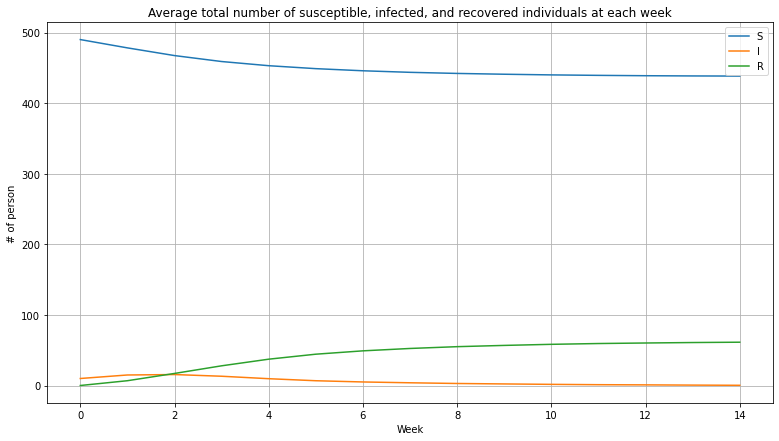

In [6]:
# Compute the average number per state {S,I,R} 
sum_sir = np.zeros([n_weeks, n_stati])

for s in simu :
    sum_sir  += count_SIR(s, n_stati)
    
avg_sir = sum_sir / n_steps

print("Average susceptible per week:\n {}".format(avg_sir[:,0]))
print("Average infected per week:\n {}".format(avg_sir[:,1]))
print("Average recovered per week:\n {}".format(avg_sir[:,2]))

# Plot the average number per state {S,I,R} 
plt.figure(figsize = (13 ,7))
plt.plot(range(n_weeks), avg_sir[:,0], label = "S") 
plt.plot(range(n_weeks), avg_sir[:,1], label = "I") 
plt.plot(range(n_weeks), avg_sir[:,2], label = "R")
plt.xlabel("Week")
plt.ylabel("# of person")
plt.title("Average total number of susceptible, infected, and recovered individuals at each week")
plt.legend()
plt.grid()
#plt.savefig("./images/Ex1_2_{}.png".format(policy) )
plt.show()

## 1.2 Generate a random graph

 Your goal is to, by using preferential attachment, generate a random graph of a large size (at least $900$ nodes) with average degree $k ∈ Z$. Let the initial graph $G_1 =(V_1,E_1)$ be a complete graph with $|V_1| = k_0 = k+1$ nodes.

In [7]:
k = 4

# Starting point Graph 
G = nx.generators.classic.complete_graph(k + 1)
nodes = 900

# Preferential attachement
for nt in range(k+1, nodes):
    
    w = np.array(G.degree)[:,1]
    prob = w / np.sum(w) 
    c = (k + (nt % 2)) // 2

    idx = np.random.choice(G.nodes(), size =c, replace=False, p =prob)
    G.add_node(nt)
    
    for link in range(c):
        G.add_edge( nt, idx[link]) 

print("Average degree:",np.mean(np.array(G.degree)[:,1]))

Average degree: 4.0


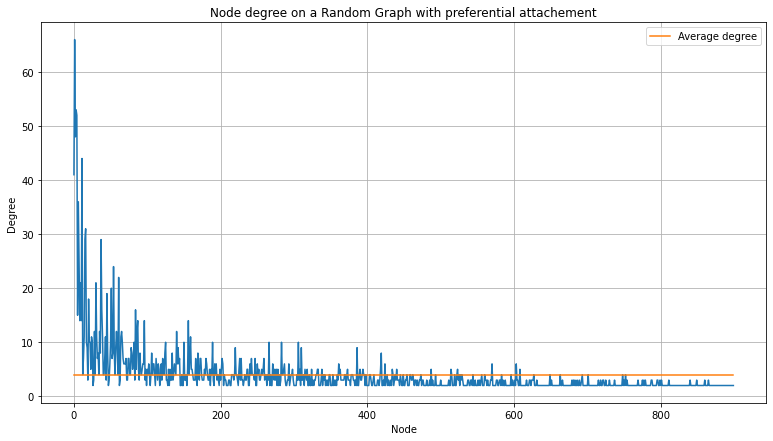

In [8]:
# Plot the degree per node 
mean_avg_degree = np.full(nodes, np.mean(np.array(G.degree)[:,1]))

plt.figure(figsize = (13 ,7))
plt.plot(range(nodes), np.array(G.degree)[:,1]) 
plt.plot(range(nodes), mean_avg_degree, label = "Average degree") 
plt.xlabel("Node")
plt.ylabel("Degree")
plt.title("Node degree on a Random Graph with preferential attachement")
plt.legend()
plt.grid()
#plt.savefig("./images/Ex1_3_{}.png".format(policy) )
plt.show()